In [ ]:
import pandas as pd

# Load your new dataset
df = pd.read_csv('../datasets/old/tripdata_2022.csv', encoding='ISO-8859-1')  # update the filename/path

# Convert 'fecha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Choose your target day (e.g., 2023-01-01)
target_date = '2022-05-05'
filtered_df = df[df['fecha'].dt.date == pd.to_datetime(target_date).date()]

# Save to a new CSV
filtered_df.to_csv('../datasets/old/tripdata_2022_05_05.csv', index=False)

# Optional: Preview
print(filtered_df.head())

C:\Users\Iva Nikolova\AppData\Local\Temp\ipykernel_19044\3641538311.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/tripdata_2022.csv")


📅 Busiest Day: 2022-05-11 — Total Trips: 30479
📅 May 5th, 2022: 2022-05-05 — Total Trips: 14913


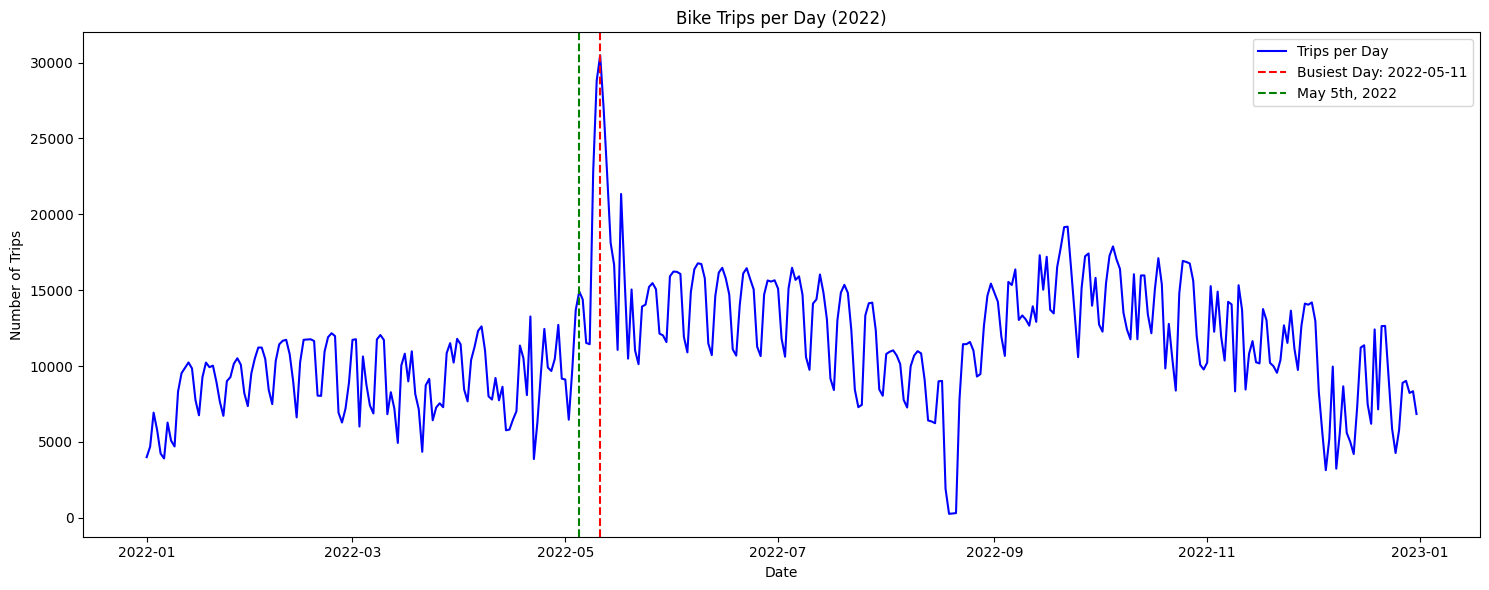

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your full-year 2022 dataset
df = pd.read_csv("../datasets/old/tripdata_2022.csv")

# Parse 'unlock_date' as datetime
df['unlock_date'] = pd.to_datetime(df['unlock_date'])

# Extract just the date
df['date_only'] = df['unlock_date'].dt.date

# Count trips per day
daily_trip_counts = df['date_only'].value_counts().sort_index()

# Key dates
busiest_day = daily_trip_counts.idxmax()
busiest_day_count = daily_trip_counts.max()
may_5th = pd.to_datetime("2022-05-05").date()
may_5th_count = daily_trip_counts.get(may_5th, 0)  # default to 0 if not present

# Print trip counts
print(f"📅 Busiest Day: {busiest_day} — Total Trips: {busiest_day_count}")
print(f"📅 May 5th, 2022: {may_5th} — Total Trips: {may_5th_count}")

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(daily_trip_counts.index, daily_trip_counts.values, 
         color='blue', linestyle='-', label='Trips per Day')

# Highlight busiest day
plt.axvline(x=busiest_day, color='red', linestyle='--', label=f'Busiest Day: {busiest_day}')

# Highlight May 5th
plt.axvline(x=may_5th, color='green', linestyle='--', label='May 5th, 2022')

# Labels
plt.title("Bike Trips per Day (2022)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load your new dataset
df = pd.read_csv('../datasets/old/tripdata_2022.csv', encoding='ISO-8859-1')  # update the filename/path

# Convert 'fetcha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Choose your target day (e.g., 2023-01-01)
target_date = '2022-05-11'
filtered_df = df[df['fecha'].dt.date == pd.to_datetime(target_date).date()]

# Save to a new CSV
filtered_df.to_csv('../datasets/old/tripdata_2022_05_11.csv', index=False)

C:\Users\Iva Nikolova\AppData\Local\Temp\ipykernel_19044\2852195164.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/tripdata_2022.csv', encoding='ISO-8859-1')  # update the filename/path


C:\Users\Iva Nikolova\AppData\Local\Temp\ipykernel_21296\2020542072.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_15_per_day = grouped.groupby('simulated_day').apply(


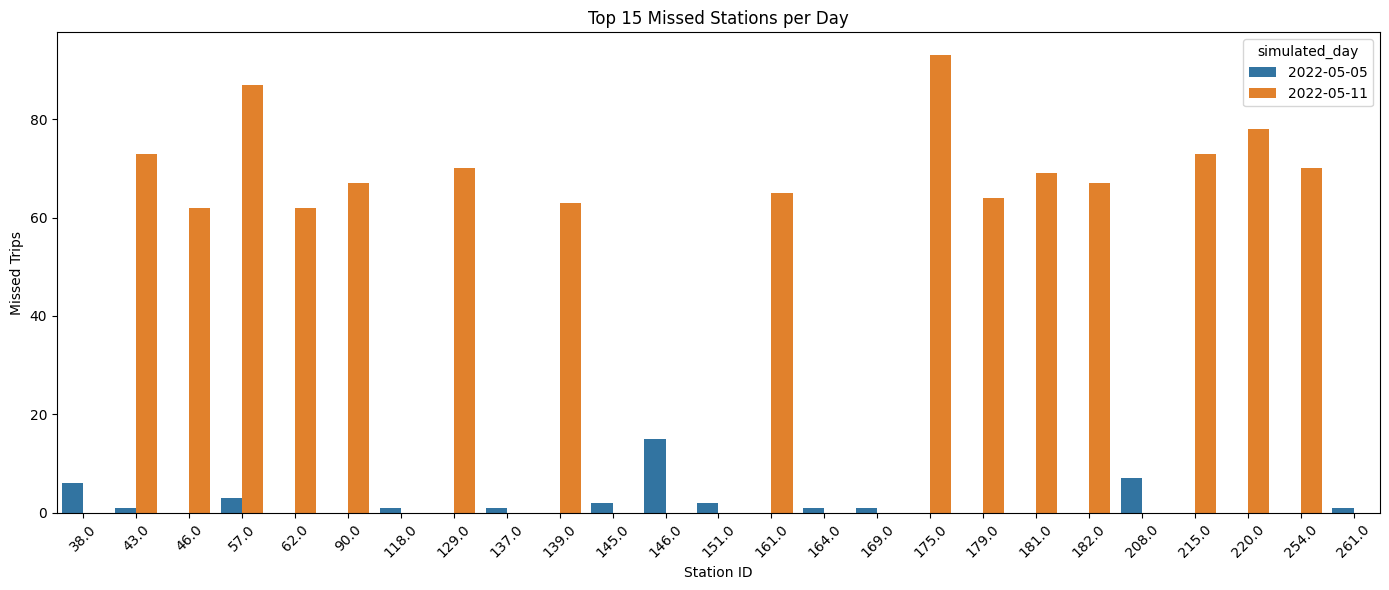

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load missed trips
df = pd.read_csv("../datasets/missed_trips.csv")

# Group by start_station and day
grouped = df.groupby(['start_station_id', 'simulated_day']).size().reset_index(name='missed_trips')

# 🔥 Select top 15 stations for each day separately
top_15_per_day = grouped.groupby('simulated_day').apply(
    lambda g: g.nlargest(15, 'missed_trips')
).reset_index(drop=True)

# ✅ Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_15_per_day, x='start_station_id', y='missed_trips', hue='simulated_day', dodge=True)
plt.title("Top 15 Missed Stations per Day")
plt.xlabel("Station ID")
plt.ylabel("Missed Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Station status indicators
import pandas as pd
from IPython.display import display, HTML

# Load both stats files
stats_05 = pd.read_csv("../datasets/station_stats_2022-05-05.csv")
stats_11 = pd.read_csv("../datasets/station_stats_2022-05-11.csv")

# Status categories (ensure consistency across both)
all_statuses = ["busy", "idle", "always_empty", "always_full", "balanced"]

# Function to summarize statuses and fill missing with 0
def summarize_statuses(df, date_label):
    summary = df['status'].value_counts().reindex(all_statuses, fill_value=0).reset_index()
    summary.columns = ['status', 'count']
    summary['day'] = date_label
    return summary

# Summarize each day
summary_05 = summarize_statuses(stats_05, '2022-05-05')
summary_11 = summarize_statuses(stats_11, '2022-05-11')

# Display side-by-side tables
display(HTML(f"""
<div style="display: flex; gap: 10px;">
    <div>
        <h4 style="text-align: center;"> Status on 2022-05-05</h4>
        {summary_05.to_html(index=False)}
    </div>
    <div>
        <h4 style="text-align: center;"> Status on 2022-05-11</h4>
        {summary_11.to_html(index=False)}
    </div>
</div>
"""))



status,count,day
busy,141,2022-05-05
idle,1,2022-05-05
always_empty,10,2022-05-05
always_full,12,2022-05-05
balanced,74,2022-05-05
status,count,day
busy,214,2022-05-11
idle,1,2022-05-11
always_empty,8,2022-05-11
always_full,3,2022-05-11
